In [1]:
# Lab 7 Learning rate and Evaluation
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
training_epochs = 15
batch_size = 100

In [4]:
# MNIST dataset
# root : 어느 경로에 MNIST 데이터가 있는지
# train : True - trainset을 불러올지 
#         False - testset을 불러올지
# transform : MNIST 이미지를 불러올 때 어떤 transform을 불러올지
#             pytorch : image는 0-1사이의 값을 갖고 Channel, Height, width순으로 값을 가짐
#             image : 0-255의 값으로 가지고 Height, width, channel 순서로 되어있음.
# toTensor는 image를 pytorch 값으로 변경해준다.
#download : MNIST가 root에 없으면 다운을 받겠다는 의미 
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [5]:
# dataset loader
# dataset : 어떤 데이터를 로드할지
# batch_size : 몇개씩 잘라서 불러올지
# shuffle : 60000만장 중 100개씩 순서를 무작위로 가져올지에 대한 여부
# drop_last : batch size로 나누었을때 뒤에 개수가 안맞아떨어지는 경우 사용하지 않으면 True
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [6]:
# softmax 를 위해 linear 활용할 것 
# MNIST data image of shape 28 * 28 = 784
# y는 0부터 9까지이므로 10가지
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [7]:
# define cost/loss & optimizer
# pytorch에서는 softmax entropy 자동으로 계산해줌
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1) # weight, bias ->  parameter

In [8]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    # data 불러오기
    # X : mnist image
    # Y : label (0-9)
    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        # x를 784로 바꾸어줌 (view를 활용하여!)
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        
        optimizer.zero_grad()
        # X를 linear에 넣으면 분류 결과가 나옴
        hypothesis = linear(X)
        # 분류 결과와 Y비교하여 cost 계산해냄
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535468459
Epoch: 0002 cost = 0.359274179
Epoch: 0003 cost = 0.331187546
Epoch: 0004 cost = 0.316578090
Epoch: 0005 cost = 0.307158202
Epoch: 0006 cost = 0.300180763
Epoch: 0007 cost = 0.295130193
Epoch: 0008 cost = 0.290851474
Epoch: 0009 cost = 0.287417084
Epoch: 0010 cost = 0.284379542
Epoch: 0011 cost = 0.281825185
Epoch: 0012 cost = 0.279800713
Epoch: 0013 cost = 0.277808994
Epoch: 0014 cost = 0.276154339
Epoch: 0015 cost = 0.274440855
Learning finished


Accuracy: 0.8863000273704529
Label:  8
Prediction:  3


/opt/conda/lib/python3.6/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/opt/conda/lib/python3.6/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


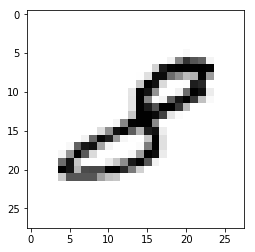

In [9]:
# Test the model using test sets
# 이 범위 안에서느 gradient 계산을 안하겠다는 의미
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    # 예측된 결과와 실제 test label 간의 맞는 정도
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    
    # image로 보여주려함
    # Get one and predict , 무작위로 image하나를 뽑아서 예측을 해보기 위함
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)
    
    # 실제값
    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    # 예측값
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()